In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
class ShallowNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden_output = self.hidden(x)
        relu_output = self.relu(hidden_output)
        output = self.output(relu_output)
        return output, hidden_output, relu_output



In [4]:
input_size = 1   
hidden_size = 3  
output_size = 1  


In [5]:
# Define a simple input tensor (e.g., x values from 0 to 2)
x = torch.linspace(-2, 2, steps=100).view(-1, 1)

In [6]:
model = ShallowNN(input_size, hidden_size, output_size)

output, hidden_output, relu_output = model(x)

print(f'Pesos das unidades da camada escondida:\n     {model.hidden.weight.data}\n')
print(f'Bias das unidades da camada escondida:\n      {model.hidden.bias.data}\n')
print(f'pesos das unidades da camada de output:\n     {model.output.weight.data}\n')
print(f'bias das unidades da camada de output:\n      {model.output.bias.data}')

Pesos das unidades da camada escondida:
     tensor([[-0.6966],
        [-0.4230],
        [-0.6323]])

Bias das unidades da camada escondida:
      tensor([ 0.9644, -0.5762, -0.1014])

pesos das unidades da camada de output:
     tensor([[ 0.2137, -0.1896,  0.1661]])

bias das unidades da camada de output:
      tensor([0.2277])


In [7]:
print(f'{hidden_output[:5]}\n')
print(f'{relu_output[:5]}\n')
print(f'{output[:5]}\n')

tensor([[2.3577, 0.2698, 1.1633],
        [2.3296, 0.2527, 1.1378],
        [2.3014, 0.2356, 1.1122],
        [2.2733, 0.2185, 1.0867],
        [2.2451, 0.2014, 1.0611]], grad_fn=<SliceBackward0>)

tensor([[2.3577, 0.2698, 1.1633],
        [2.3296, 0.2527, 1.1378],
        [2.3014, 0.2356, 1.1122],
        [2.2733, 0.2185, 1.0867],
        [2.2451, 0.2014, 1.0611]], grad_fn=<SliceBackward0>)

tensor([[0.8736],
        [0.8666],
        [0.8596],
        [0.8526],
        [0.8456]], grad_fn=<SliceBackward0>)



In [8]:
# Convertendo para arrays para plotar
x_np = x.detach().numpy()
output_np = output.detach().numpy()
hidden_output_np = hidden_output.detach().numpy()
relu_output_np = relu_output.detach().numpy()

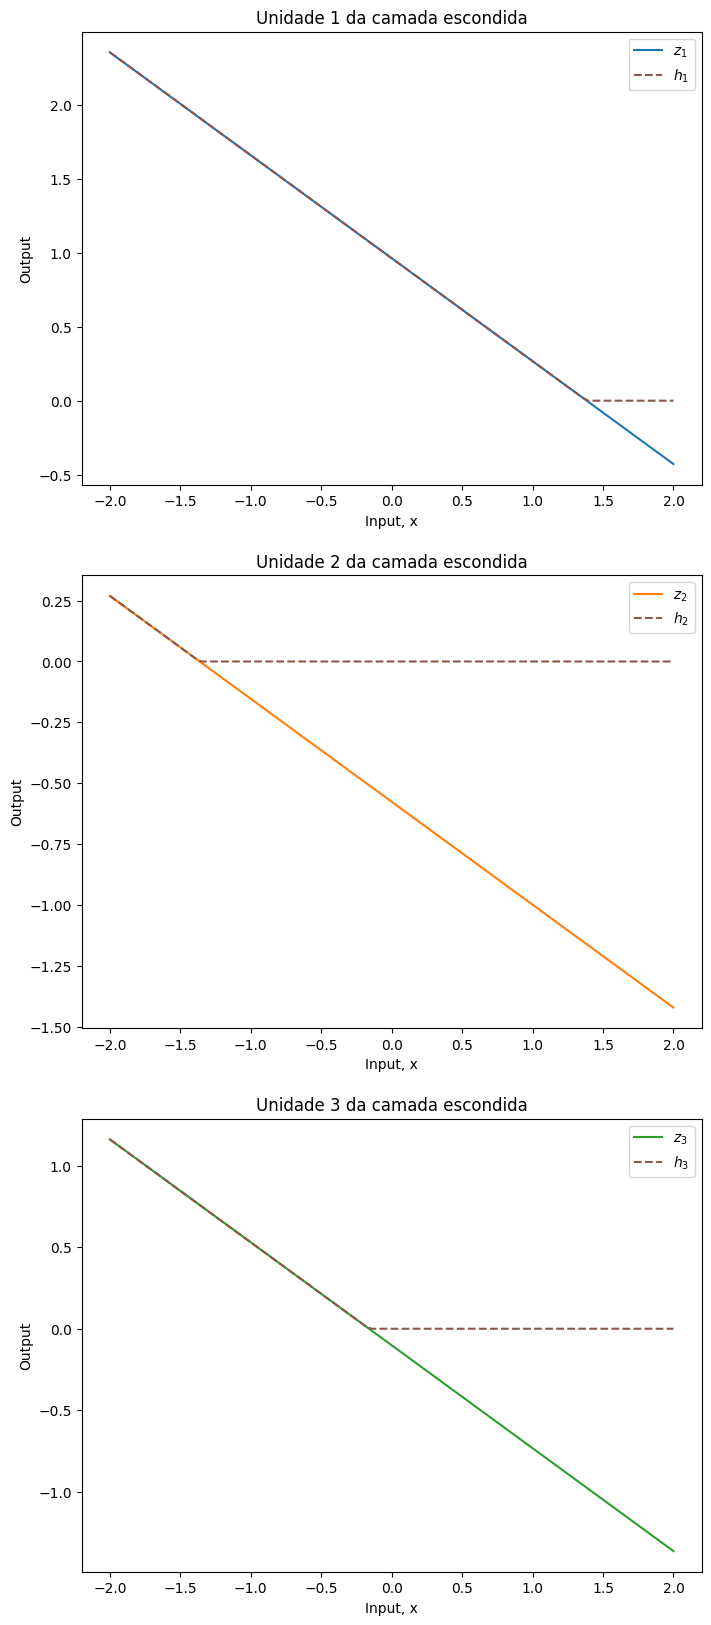

In [16]:
fig, axs = plt.subplots(3, figsize=(8, 20))

# Plot pré-ativação
for i in range(hidden_size):
    axs[i].plot(x, hidden_output_np[:, i], label=f'$z_{i+1}$', color=f'C{i}')
    axs[i].set_title(f'Unidade {i+1} da camada escondida')
    axs[i].set_xlabel('Input, x')
    axs[i].set_ylabel('Output')
    axs[i].legend()

# Plot saída da ativação

for i in range(hidden_size):
    axs[i].plot(x_np, relu_output_np[:, i], label=f'$h_{i+1}$', linestyle='--', color=f'C{5}')
    axs[i].legend()


plt.show()


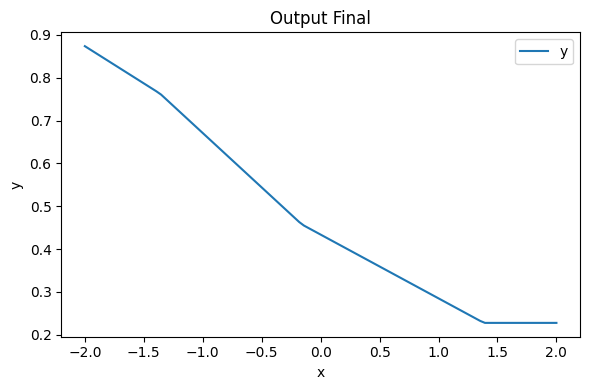

In [10]:
# Plot the final network output
plt.figure(figsize=(6, 4))
plt.plot(x_np, output_np, label='y')
plt.title('Output Final')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


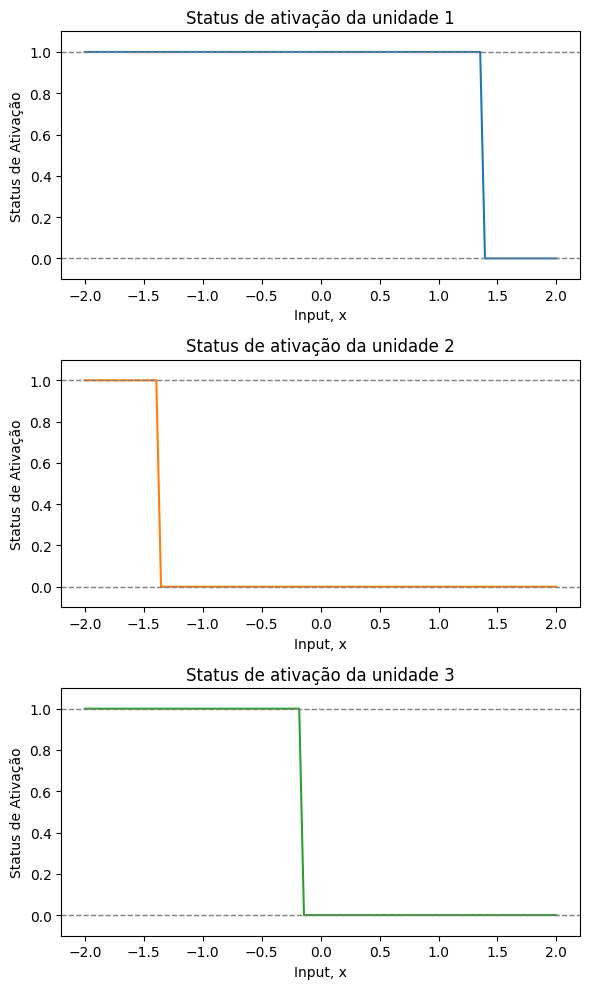

In [23]:
activated_units = relu_output_np > 0


fig, axs = plt.subplots(hidden_size, figsize=(6, 10))

for i in range(hidden_size):
    axs[i].plot(x_np, activated_units[:, i],  color=f'C{i}')
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)  
    axs[i].axhline(1, color='gray', linestyle='--', linewidth=1)  
    axs[i].set_title(f'Status de ativação da unidade {i+1}')
    axs[i].set_xlabel('Input, x')
    axs[i].set_ylabel('Status de Ativação')
    axs[i].set_ylim(-0.1, 1.1) 

plt.tight_layout()
plt.show()